In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
monkeyPox_data=pd.read_csv('Worldwide_Case_Detection_Timeline.csv')

Our dataset contains the data of individual person. 

Information of monkeyPox_dataset

In [3]:
monkeyPox_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46863 entries, 0 to 46862
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        46863 non-null  object
 1   Country                  46863 non-null  object
 2   City                     1146 non-null   object
 3   Age                      2698 non-null   object
 4   Gender                   2207 non-null   object
 5   Symptoms                 278 non-null    object
 6   Hospitalised (Y/N/NA)    413 non-null    object
 7   Isolated (Y/N/NA)        582 non-null    object
 8   Travel_history (Y/N/NA)  419 non-null    object
dtypes: object(9)
memory usage: 3.2+ MB


Description of the Dataset

In [4]:
monkeyPox_data.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,46863,46863,1146,2698,2207,278,413,582,419
unique,113,103,161,87,7,80,2,2,2
top,2022-08-22,United States,Toronto,20-69,male,fever,Y,Y,Y
freq,2064,17082,438,585,2162,52,222,580,318


Null values in individual dataset row-wise

In [5]:
monkeyPox_data.isnull().sum(axis=1)

0        7
1        7
2        7
3        6
4        6
        ..
46858    7
46859    7
46860    7
46861    7
46862    7
Length: 46863, dtype: int64

Null values in every column

In [6]:
monkeyPox_data.isnull().sum()

Date_confirmation              0
Country                        0
City                       45717
Age                        44165
Gender                     44656
Symptoms                   46585
Hospitalised (Y/N/NA)      46450
Isolated (Y/N/NA)          46281
Travel_history (Y/N/NA)    46444
dtype: int64

Data cleaning

monkeyPox_dataset has 9 columns. If ther are rows that have more than 6 or 7 null values and number of those rows are high then there is no use of those rows. So, check how many rows fall in this category and discard them.

In [7]:
len(monkeyPox_data.loc[monkeyPox_data.isnull().sum(axis=1)>=6])

44679

For better analysis, use rows that have minimum number of null values.

In [8]:
monkeyPox_data=monkeyPox_data.loc[monkeyPox_data.isnull().sum(axis=1)<=len(monkeyPox_data.columns)/2]

Shape of the Dataset, to know the number of rows and columns

In [9]:
print(monkeyPox_data.shape)
monkeyPox_data.reset_index(inplace=True)

(977, 9)


All attributes are object type. We can fill missing values of with the maximum frequency value of the corresponding value. But in case of City, we need to take care of valid country,city combinations.

In [10]:
temp=monkeyPox_data.groupby('Country')['City'].count()


In [11]:
rough=[] #list of countries that have no city
for i in temp.index:
    if(temp[i]==0):
        rough.append(i)
len(rough)

34

If we have no city for a country then we cannot fill any value in the city column for that country. So we have deleted those countries.

In [12]:
monkeyPox_data.drop(monkeyPox_data.loc[monkeyPox_data['Country'].map(lambda x: True if x in rough else False) ].index,inplace=True)

Data left 

In [13]:
monkeyPox_data.shape

(892, 10)

Unique country names

In [14]:
countries=monkeyPox_data['Country'].unique()

In [15]:
countries

array(['England', 'Portugal', 'Spain', 'United States', 'Belgium',
       'Germany', 'Canada', 'Italy', 'Sweden', 'France', 'Australia',
       'Switzerland', 'Israel', 'Austria', 'Czech Republic', 'Finland',
       'Argentina', 'Mexico', 'Gibraltar', 'Brazil', 'Poland', 'Romania',
       'Hungary', 'Chile', 'South Korea', 'South Africa', 'Colombia',
       'Peru', 'Dominican Republic', 'Saudi Arabia', 'India', 'Thailand',
       'Guatemala'], dtype=object)

In [16]:
temp=monkeyPox_data.set_index('Country')['City']

In [17]:
monkeyPox_data

,index,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,26,2022-05-06,England,London,NaN,NaN,rash,Y,Y,Y
1,37,2022-05-12,England,London,NaN,NaN,rash,Y,Y,N
2,38,2022-05-13,England,London,NaN,NaN,vesicular rash,N,Y,N
3,39,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N
4,40,2022-05-15,England,London,NaN,male,vesicular rash,NaN,Y,N
...,...,...,...,...,...,...,...,...,...,...
964,39422,2022-08-17,South Africa,Johannesburg,20-40,male,NaN,NaN,NaN,Y
971,42113,2022-08-19,Guatemala,Guatemala City,35-39,male,NaN,NaN,Y,NaN
973,42353,2022-08-21,Dominican Republic,NaN,30-60,male,NaN,Y,NaN,NaN
975,45641,2022-08-24,Dominican Republic,NaN,40-39,male,NaN,NaN,Y,NaN


In [18]:
countryCity={} #Object, key=Country and value=city of the corresponding country
for i in countries:
    if(type(temp[i])==str): # if a country has only one city, then it's type is string in dataset
        countryCity[i]=temp[i]
    else:
        countryCity[i]=list(item for item in temp[i].values if not np.nan is item)[0]
        

In [19]:
monkeyPox_data.reset_index(inplace=True)

In [20]:
t=monkeyPox_data.stack(dropna=False)

In [21]:
t

0    level_0                             0
     index                              26
     Date_confirmation          2022-05-06
     Country                       England
     City                           London
                                   ...    
891  Gender                           male
     Symptoms                          NaN
     Hospitalised (Y/N/NA)             NaN
     Isolated (Y/N/NA)                   Y
     Travel_history (Y/N/NA)           NaN
Length: 9812, dtype: object

In [22]:
monkeyPox_data['City'].isnull().sum()

250

In [23]:
countryCity

{'England': 'London',
 'Portugal': 'Lisbon',
 'Spain': 'Madrid',
 'United States': 'Boston',
 'Belgium': 'Antwerp',
 'Germany': 'Munich',
 'Canada': "Clinique l'Actuel, Montreal",
 'Italy': 'Rome',
 'Sweden': 'Stockholm',
 'France': 'île-de-France',
 'Australia': 'Sydney',
 'Switzerland': 'Bern',
 'Israel': 'Tel Aviv',
 'Austria': 'Vienna',
 'Czech Republic': 'Prague',
 'Finland': 'Hus',
 'Argentina': 'Buenos Aires',
 'Mexico': 'Mexico City',
 'Gibraltar': 'Gibraltar',
 'Brazil': 'Sao Paulo',
 'Poland': 'Warsaw',
 'Romania': 'Bucharest',
 'Hungary': 'Budapest',
 'Chile': 'Santiago',
 'South Korea': 'Incheon',
 'South Africa': 'Cape Town',
 'Colombia': 'Bogotá',
 'Peru': 'Lima',
 'Dominican Republic': 'Santo Domingo',
 'Saudi Arabia': 'Riyadh',
 'India': 'Delhi',
 'Thailand': 'Phuket',
 'Guatemala': 'Guatemala City'}

If any city has NaN value then fill that value with any city name of the corresponding country

In [24]:
for i in range(len(monkeyPox_data)):
    if(t[i]['City'] is np.nan):
        t[i]['City']=countryCity[t[i]['Country']]

In [25]:
monkeyPox_data=t.unstack()

In [26]:
temp=monkeyPox_data.describe()

For the rest of the column, fill na values with the most occured value of that column

In [27]:
for col in monkeyPox_data.columns:
    monkeyPox_data[col].fillna(temp[col]['top'],inplace=True)

Now we have zero null values

In [28]:
monkeyPox_data.isnull().sum()

level_0                    0
index                      0
Date_confirmation          0
Country                    0
City                       0
Age                        0
Gender                     0
Symptoms                   0
Hospitalised (Y/N/NA)      0
Isolated (Y/N/NA)          0
Travel_history (Y/N/NA)    0
dtype: int64

In [29]:
monkeyPox_data.count()

level_0                    892
index                      892
Date_confirmation          892
Country                    892
City                       892
Age                        892
Gender                     892
Symptoms                   892
Hospitalised (Y/N/NA)      892
Isolated (Y/N/NA)          892
Travel_history (Y/N/NA)    892
dtype: int64

There is no use of level_0 and index column, so drop them.

In [30]:
monkeyPox_data.drop(columns=['level_0','index'],inplace=True)


In [31]:
monkeyPox_data['Gender'].value_counts()

male         862
Male          14
female        13
male           2
male           1
Name: Gender, dtype: int64

There are four types of male, which is incorrect. So replace the male string values with 'male'

In [32]:
monkeyPox_data['Gender'].unique()

array(['male', 'male     ', 'female', 'male ', 'Male'], dtype=object)

In [33]:
monkeyPox_data['Gender'].replace(['male','male     ','male ','Male'],'male',inplace=True)

In [34]:
monkeyPox_data['Gender'].unique()

array(['male', 'female'], dtype=object)

# Data Analysis

1.	Countries having maximum and minimum number of cases

In [35]:
result=monkeyPox_data.groupby('Country')['Age'].count()
print('Country with maximum cases: ',result.idxmax())
print('Country with minimum cases: ',result.idxmin())

Country with maximum cases:  Canada
Country with minimum cases:  Gibraltar


2.	Cities having maximum and minimum number of cases country wise.

Name of the city with maximum cases country-wise


In [36]:
temp=monkeyPox_data.groupby(['Country','City'],as_index=False)['Age'].count()

In [37]:
max_cases=temp.sort_values(by='Age',ascending=False)
max_cases.drop_duplicates(keep='first',inplace=True,subset='Country')
max_cases.rename(columns={'Age':'PatientCount'},inplace=True)
print("City name with maximum patients country wise, patient count")
display(max_cases)

City name with maximum patients country wise, patient count


,Country,City,PatientCount
47,Canada,Toronto,286
105,Portugal,Lisbon,59
115,Spain,Madrid,38
126,United States,Boston,38
106,Romania,Bucharest,20
78,Germany,Munich,19
51,Chile,Santiago,17
64,France,île-de-France,15
56,England,London,15
84,Hungary,Budapest,14


<AxesSubplot:xlabel='Country,City'>

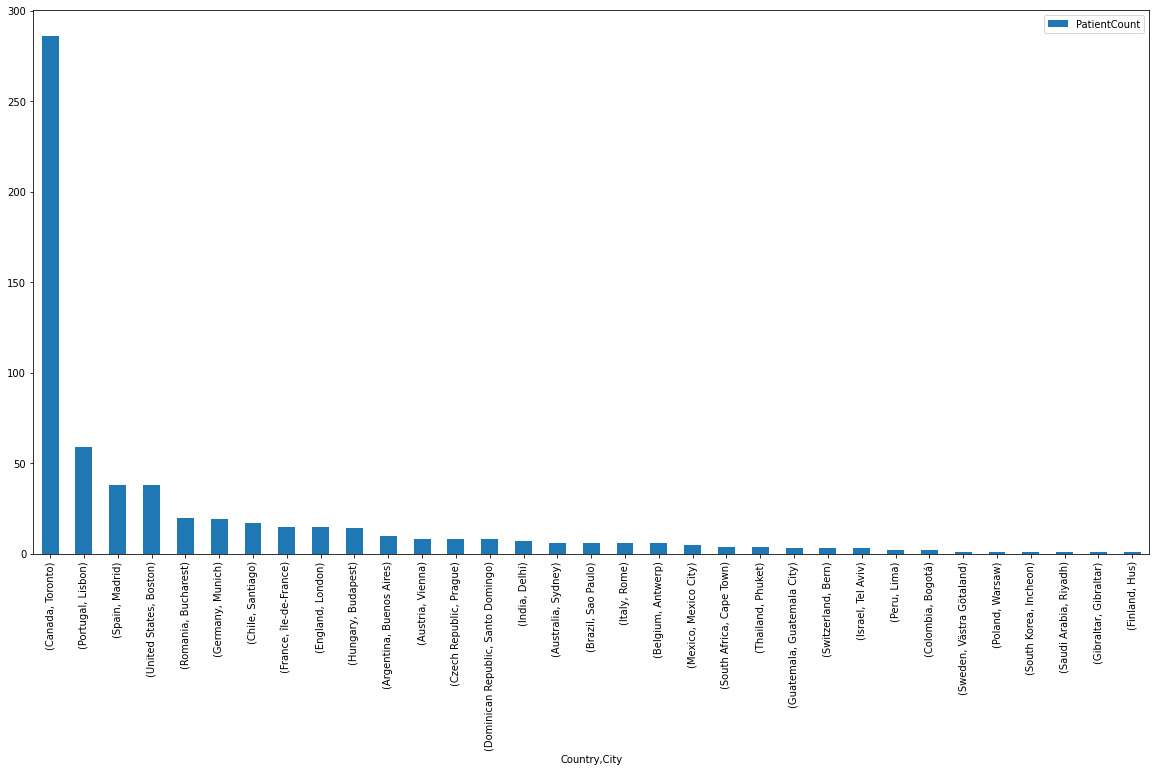

In [38]:
max_cases.set_index(['Country','City']).plot.bar(figsize=(20,10))


City names with minimum cases country wise

In [39]:
min_cases=temp.sort_values(by='Age')
min_cases.drop_duplicates(keep='first',inplace=True,subset='Country')
min_cases.rename(columns={'Age':'PatientCount'},inplace=True)
print("City name with minimum patients country wise, patient count")
display(min_cases)

City name with minimum patients country wise, patient count


,Country,City,PatientCount
65,Germany,Aachen,1
89,Italy,Brescia,1
82,Gibraltar,Gibraltar,1
63,France,Toulouse,1
60,Finland,Hus,1
58,England,South East,1
129,United States,Denver,1
122,Thailand,Bangkok,1
120,Sweden,Västra Götaland,1
118,Spain,Tenerife,1


<AxesSubplot:xlabel='Country,City'>

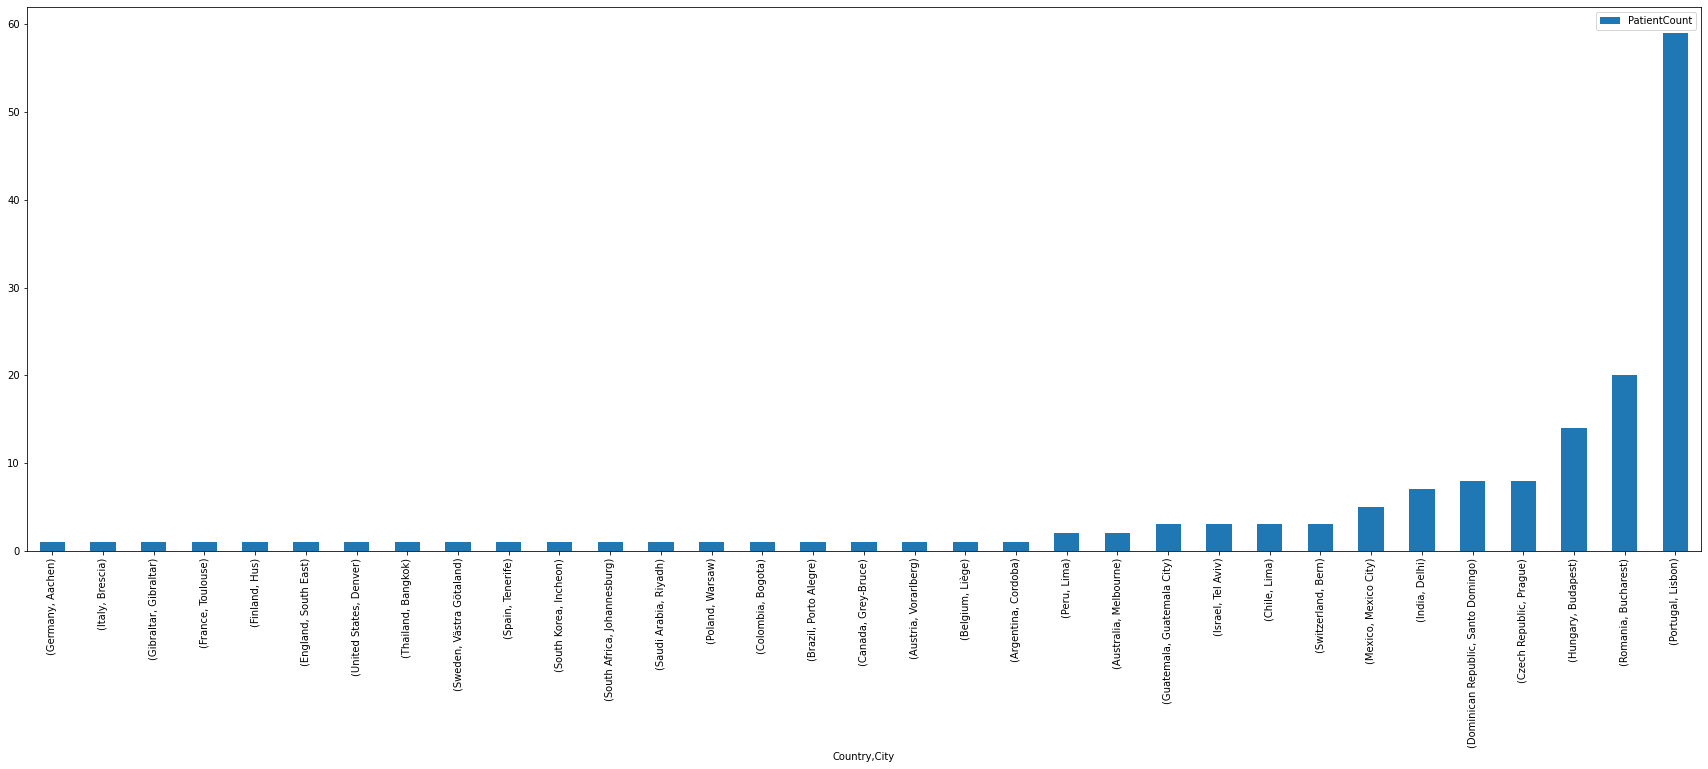

In [40]:
min_cases.set_index(['Country','City']).plot.bar(figsize=(30,10))


3.	Countries having maximum and minimum number of hospitalized cases.

In [41]:
result=monkeyPox_data.groupby(['Country','Hospitalised (Y/N/NA)'],as_index=False)['Age'].count()
result
# print('Country with maximum hospitalized cases: ',result.idxmax())
# print('Country with minimum hospitalized cases: ',result.idxmin())

,Country,Hospitalised (Y/N/NA),Age
0,Argentina,Y,12
1,Australia,N,4
2,Australia,Y,4
3,Austria,N,6
4,Austria,Y,3
5,Belgium,Y,9
6,Brazil,N,3
7,Brazil,Y,20
8,Canada,N,14
9,Canada,Y,440


Extract countries with hospitalised cases and maximum and minimum from that

In [42]:
hospitalised=result[result['Hospitalised (Y/N/NA)']=='Y']
hospitalised.rename(columns={'Age':'Count'},inplace=True)

C:\Users\91914\AppData\Local\Temp\ipykernel_8840\543569079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalised.rename(columns={'Age':'Count'},inplace=True)


In [43]:
print("Country with maximum hospitalised cases:")
maximum=hospitalised[hospitalised['Count']==hospitalised['Count'].max()]
display(maximum)
print("Country with mainimum hospitalised cases:")
minimum=hospitalised[hospitalised['Count']==hospitalised['Count'].min()]
display(minimum)

Country with maximum hospitalised cases:


,Country,Hospitalised (Y/N/NA),Count
9,Canada,Y,440


Country with mainimum hospitalised cases:


,Country,Hospitalised (Y/N/NA),Count
17,Finland,Y,1
22,Gibraltar,Y,1
33,Poland,Y,1
37,Saudi Arabia,Y,1
39,South Korea,Y,1
43,Sweden,Y,1


4.	Relation between hospitalised and travel history attribute using count of the cases countrywise.

In [44]:
result=monkeyPox_data.groupby('Country')[['Hospitalised (Y/N/NA)','Travel_history (Y/N/NA)']]
result.value_counts()

Country        Hospitalised (Y/N/NA)  Travel_history (Y/N/NA)
Argentina      Y                      Y                          11
                                      N                           1
Australia      Y                      Y                           4
               N                      Y                           4
Austria        N                      Y                           6
                                                                 ..
Thailand       Y                      Y                           5
United States  N                      Y                          19
               Y                      Y                          18
                                      N                           6
               N                      N                           3
Length: 66, dtype: int64

5.	Compare male and female patients country-wise.

In [45]:
result=monkeyPox_data.groupby(['Country','Gender'])['Age'].count()
display(result)

Country             Gender
Argentina           male       12
Australia           male        8
Austria             male        9
Belgium             male        9
Brazil              male       23
Canada              male      454
Chile               male       20
Colombia            male        3
Czech Republic      female      1
                    male        7
Dominican Republic  female      1
                    male        7
England             female      1
                    male       16
Finland             male        2
France              male       18
Germany             female      3
                    male       45
Gibraltar           male        1
Guatemala           male        3
Hungary             male       14
India               female      2
                    male        5
Israel              male        3
Italy               male       26
Mexico              male        5
Peru                male        2
Poland              male        1
Portugal            m

6.	Find age group which is highly and minimal affected.

In [46]:
result=monkeyPox_data.groupby('Age')['City'].count()
print("Age group which is highlt affected:", result.idxmax())
print("Age group which is minimal affected:",result.idxmin())

Age group which is highlt affected: 20-69
Age group which is minimal affected: 15-20


7. Find most common symptom.

In [47]:
print("Most common symptopm:",monkeyPox_data['Symptoms'].value_counts().idxmax())

Most common symptopm: fever


8.	Globally peak date.

In [48]:
monkeyPox_data.columns

Index(['Date_confirmation', 'Country', 'City', 'Age', 'Gender', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Isolated (Y/N/NA)',
       'Travel_history (Y/N/NA)'],
      dtype='object')

In [49]:
result=monkeyPox_data.pivot_table(index=['Date_confirmation'],values='Age',aggfunc='count')
result.rename(columns={'Age':"Peak Date"},inplace=True)
result.idxmax()

Peak Date    2022-08-02
dtype: object

9. Numer of cases on each date, country-wise

In [50]:
result=monkeyPox_data.pivot_table(index=['Country','Date_confirmation'], values='Age', aggfunc='count')
result.rename(columns={'Age':"Cases Count"})

Cases Count
Country       Date_confirmation             
Argentina     2022-05-27                   2
              2022-06-09                   1
              2022-06-21                   1
              2022-06-28                   1
              2022-06-30                   1
...                                      ...
United States 2022-07-21                   2
              2022-07-27                   1
              2022-07-29                   1
              2022-08-01                   1
              2022-08-05                   1

[247 rows x 1 columns]

10. Peak date country-wise

In [51]:
result=monkeyPox_data.groupby(['Country','Date_confirmation'],as_index=False)['Age'].count()
result.rename(columns={'Age':"Cases Count"},inplace=True)

In [52]:
max_cases=result.sort_values(by='Cases Count',ascending=False)
max_cases.drop_duplicates(keep='first',inplace=True,subset='Country')
print("Peak date of every country with number of cases.")
display(max_cases)

Peak date of every country with number of cases.


,Country,Date_confirmation,Cases Count
64,Canada,2022-08-02,57
197,Spain,2022-05-20,15
170,Portugal,2022-05-23,13
73,Chile,2022-07-21,13
102,France,2022-05-28,8
115,Germany,2022-05-31,7
15,Austria,2022-06-17,6
136,Hungary,2022-07-15,6
156,Italy,2022-06-06,5
229,United States,2022-06-13,4


Data Visualisation

Bar plot to show the total case distribution within countries.

<BarContainer object of 33 artists>

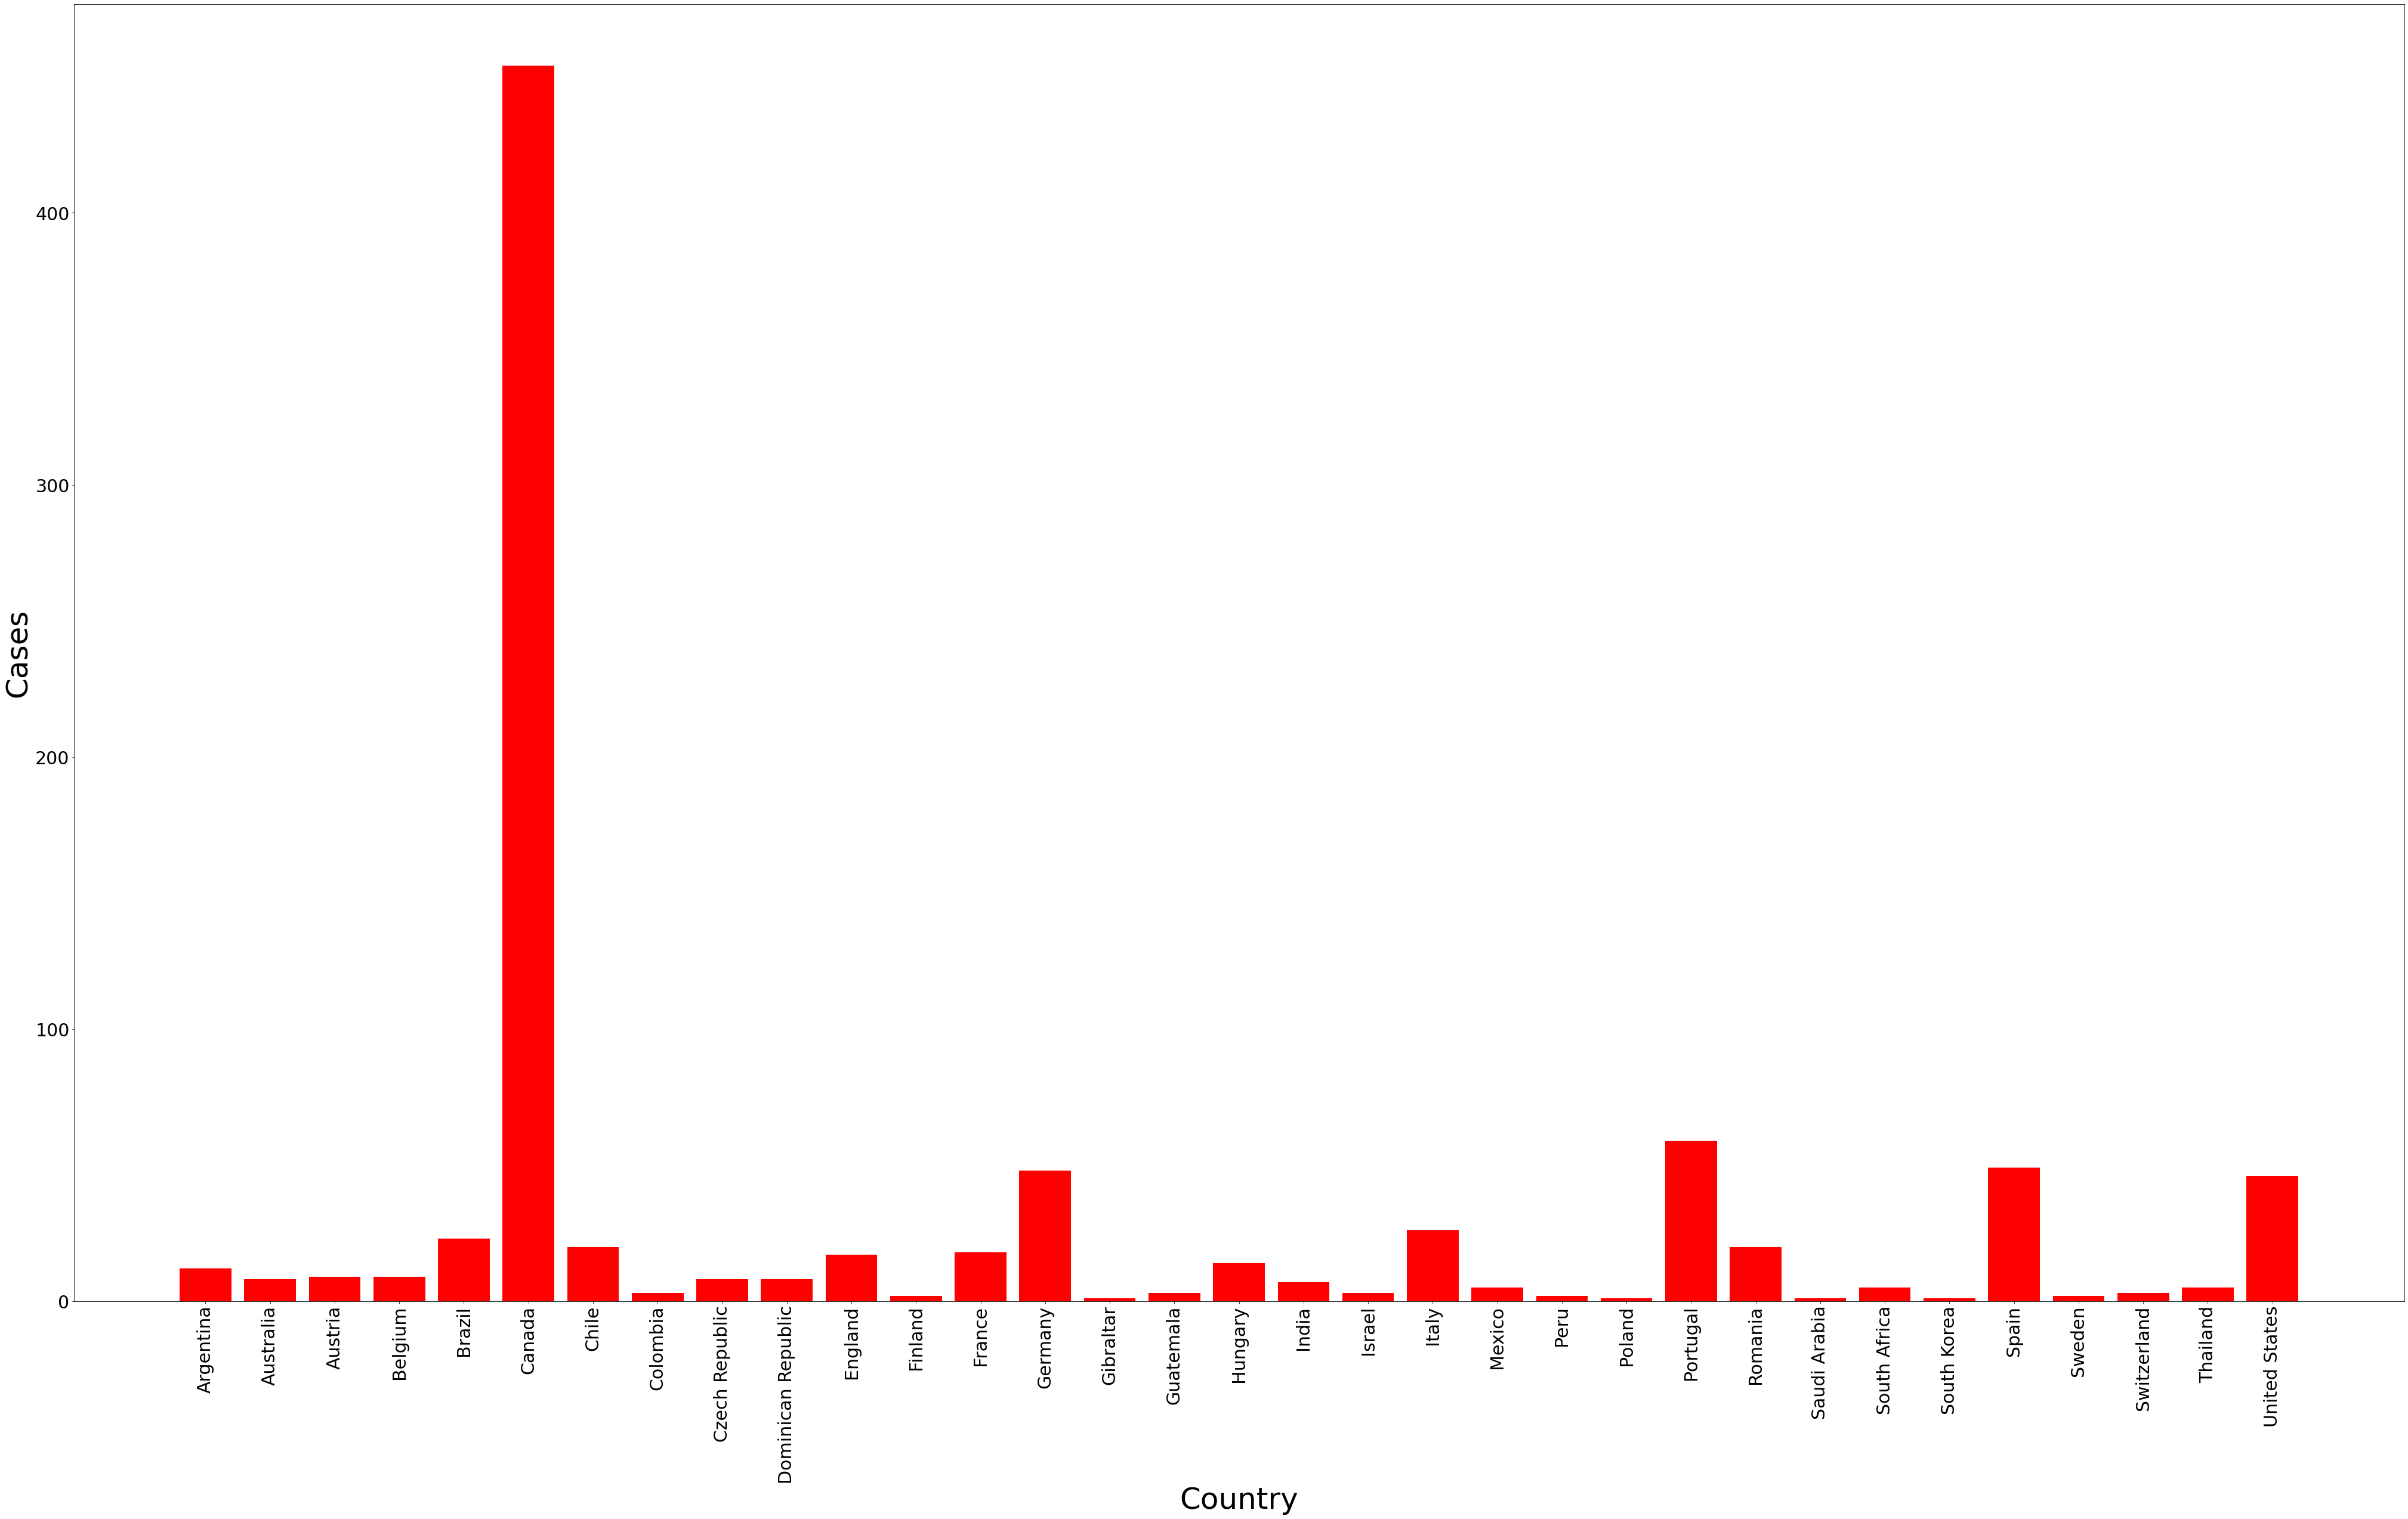

In [53]:

cases= monkeyPox_data.groupby('Country')['Age'].count()
plt.figure(figsize=[70,40])
plt.xticks(fontsize = 30, rotation = 90)
plt.yticks(fontsize = 30)
plt.xlabel('Country',size=50)
plt.ylabel("Cases",size=50)
plt.bar(cases.index,cases.values, color = 'red')

Density distribution for total cases of countries.

<AxesSubplot:ylabel='Density'>

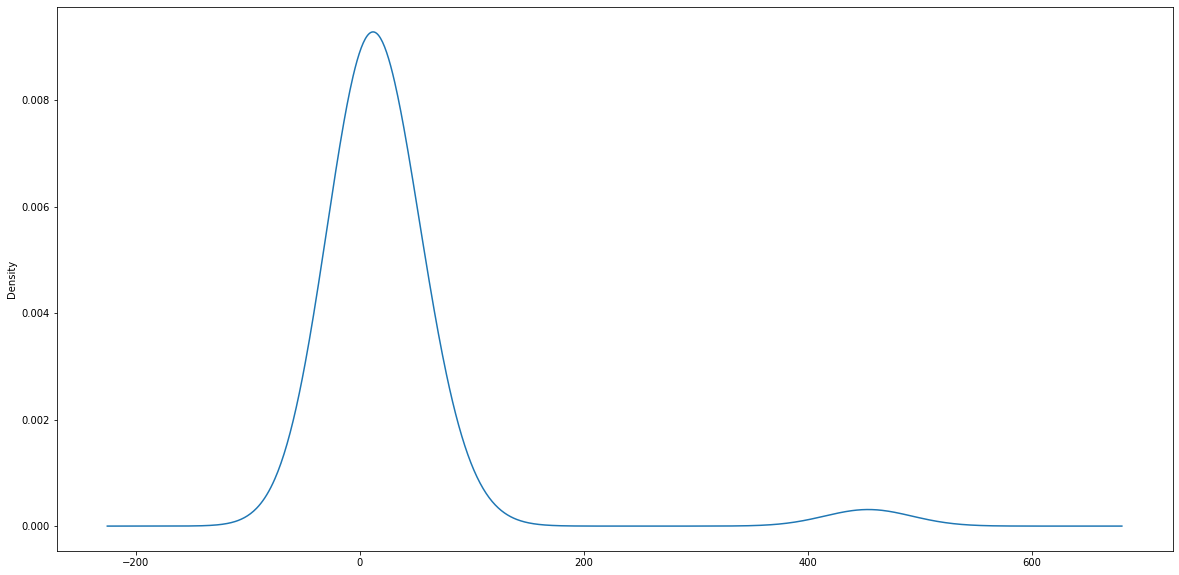

In [54]:
cases.plot.kde(figsize=(20,10))

Word cloud to show the occurences of symptoms

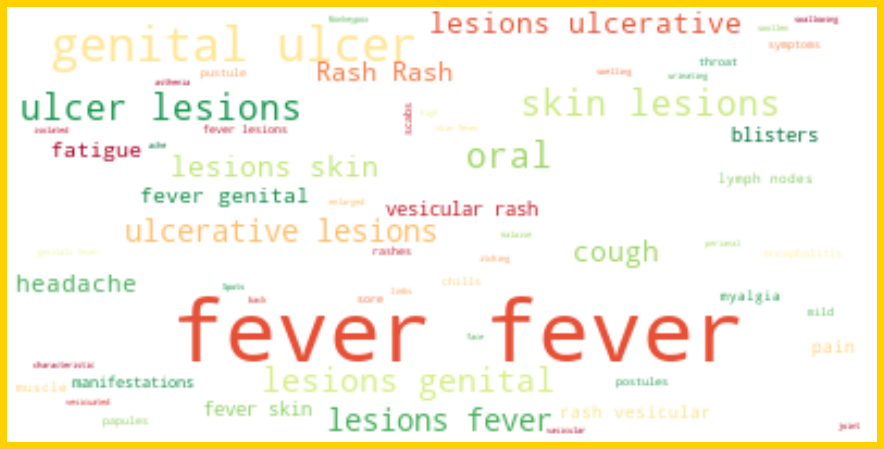

In [55]:
from wordcloud import WordCloud

text = " ".join(i for i in monkeyPox_data.Symptoms)
wordcloud = WordCloud(background_color ="white",colormap="RdYlGn",max_font_size=40).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#ffd100") 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Pie chart to show gender variation

In [56]:
data= monkeyPox_data.groupby('Gender').count()['City']

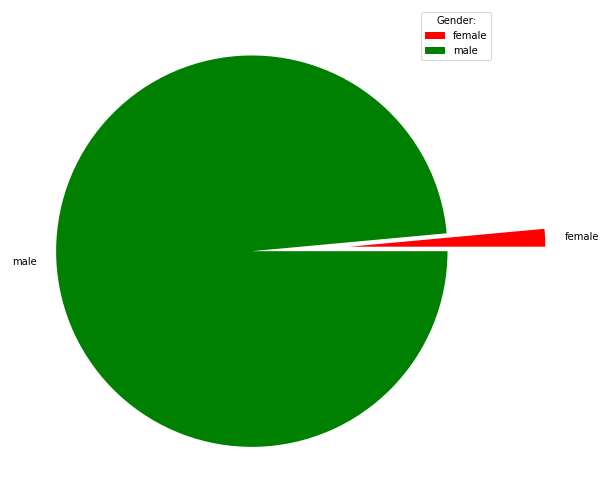

In [57]:
plt.figure(figsize=(13,9))
myexplode = [0.5,0]
plt.pie(data.values, labels = data.index, colors= ['Red', 'Green'], explode = myexplode)
plt.legend(title = "Gender:")

plt.show()

This bar plot will show the frequency of Symptom with respect to the age group...

Text(0, 0.5, 'Case count')

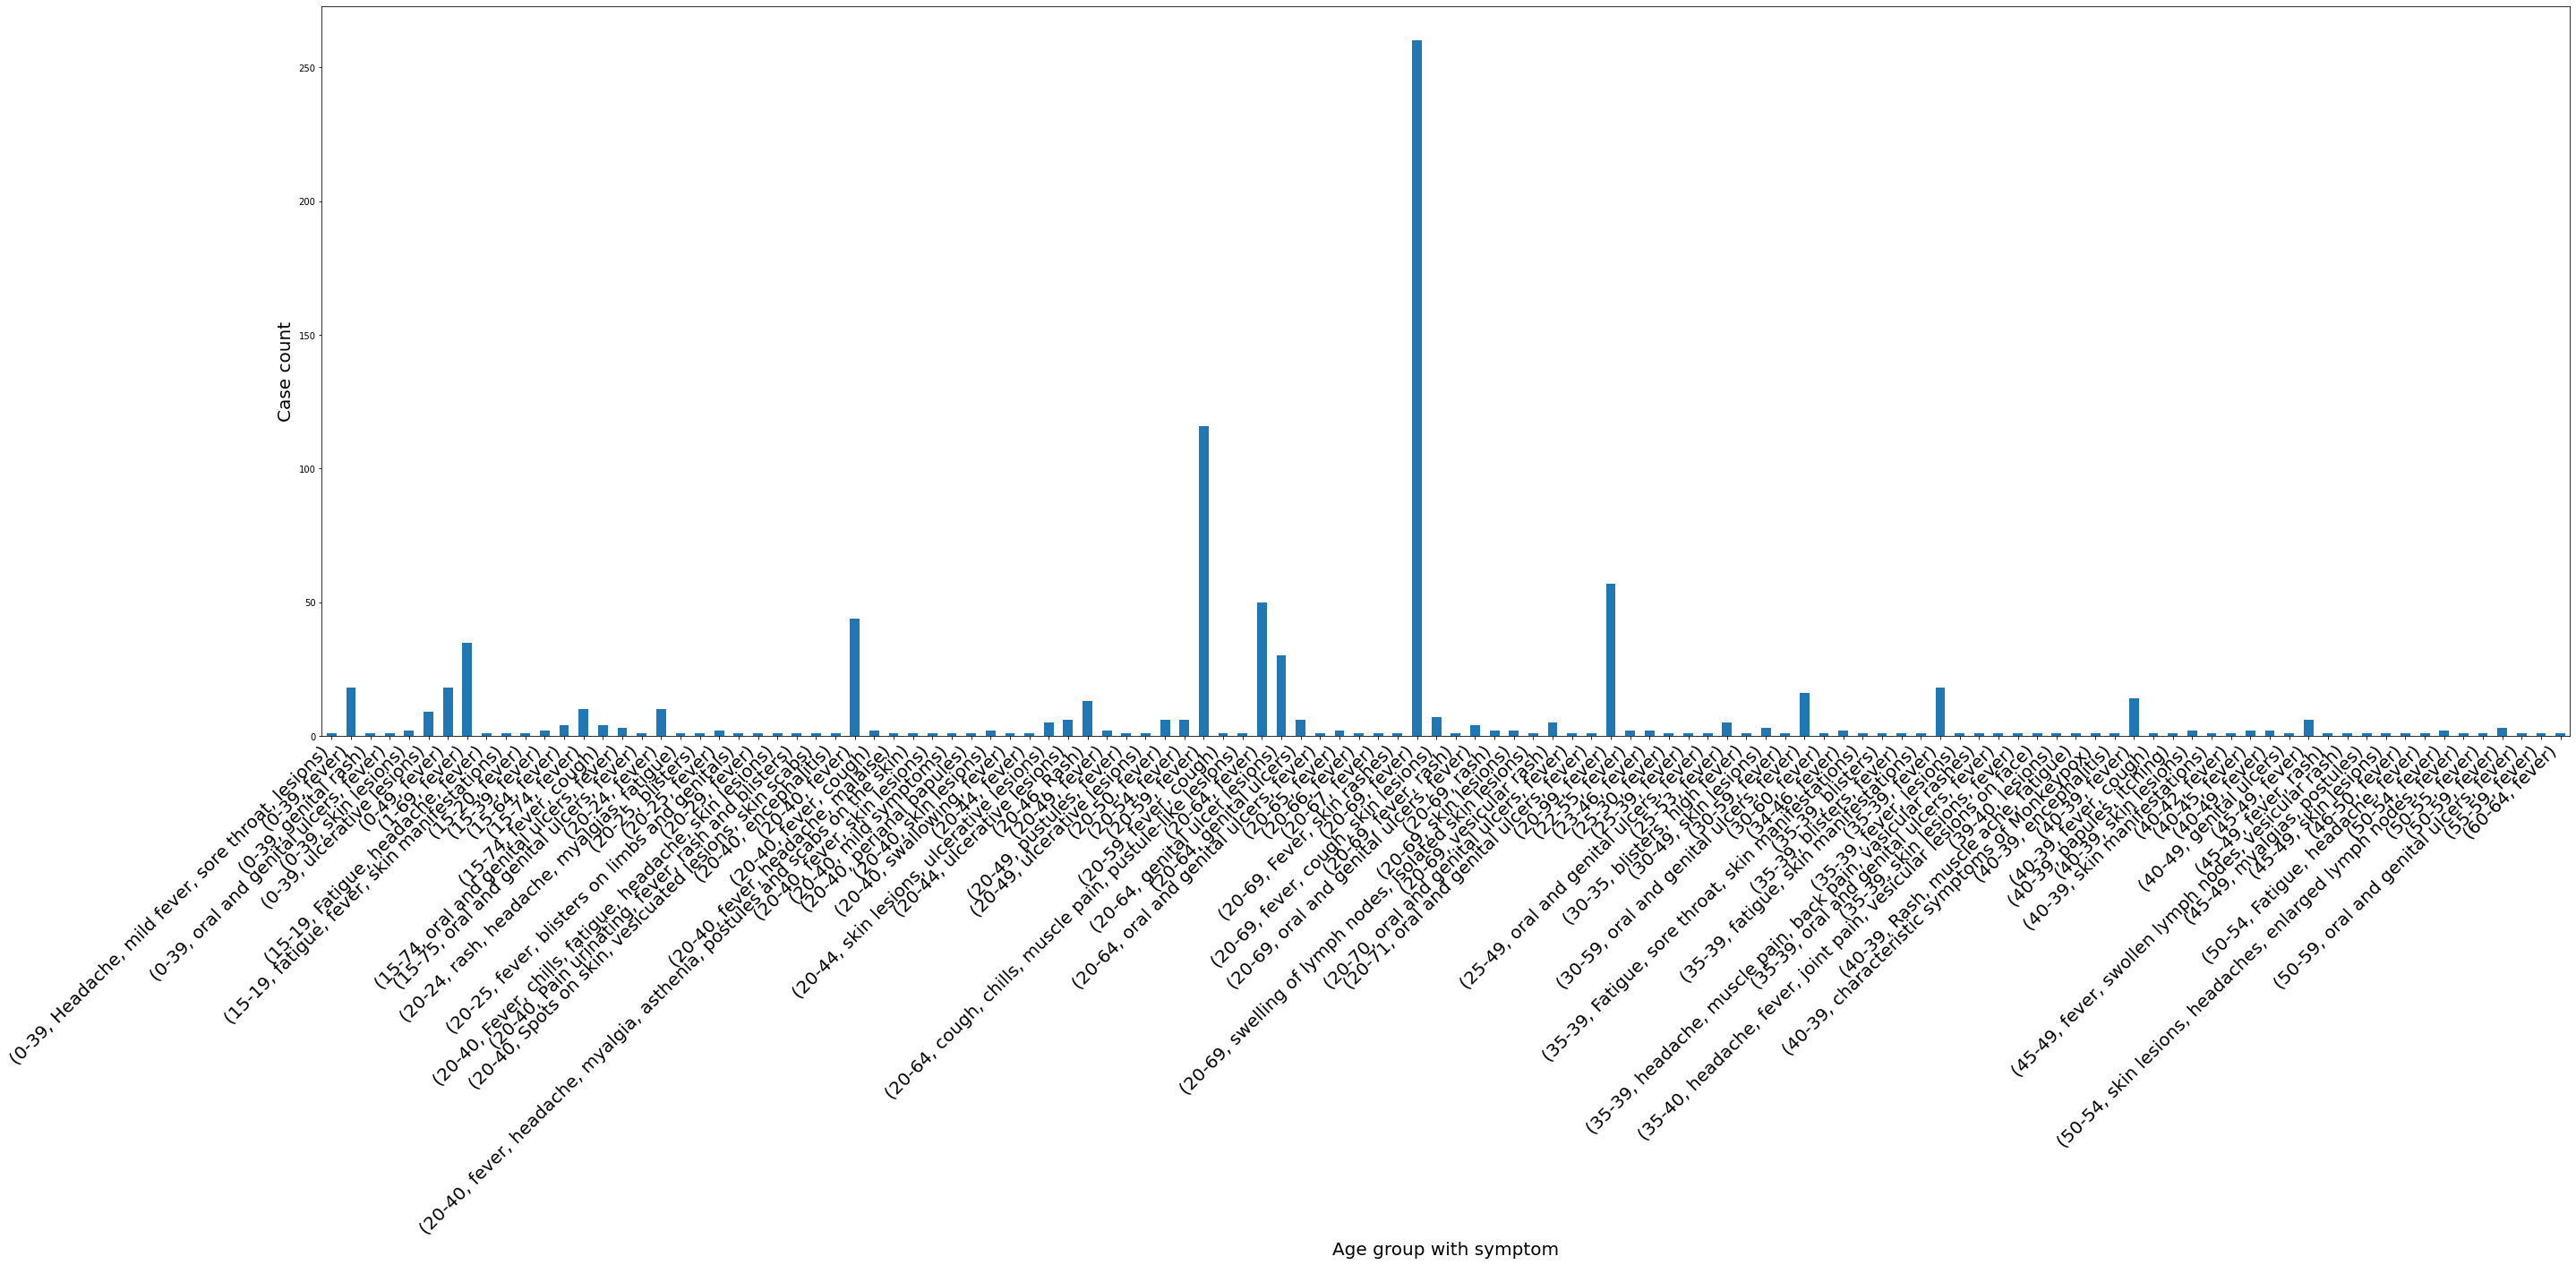

In [58]:
plt.figure(figsize=(45,15))
xx = monkeyPox_data.groupby(['Age', 'Symptoms'])["Gender"].count()
xx.plot(kind="bar")
plt.xticks(rotation = 45, ha = 'right', fontsize = 20 )
plt.xlabel("Age group with symptom",size=20)
plt.ylabel("Case count",size=20)

Bar graph showing the frequency of symptoms

Text(0, 0.5, 'Frequency')

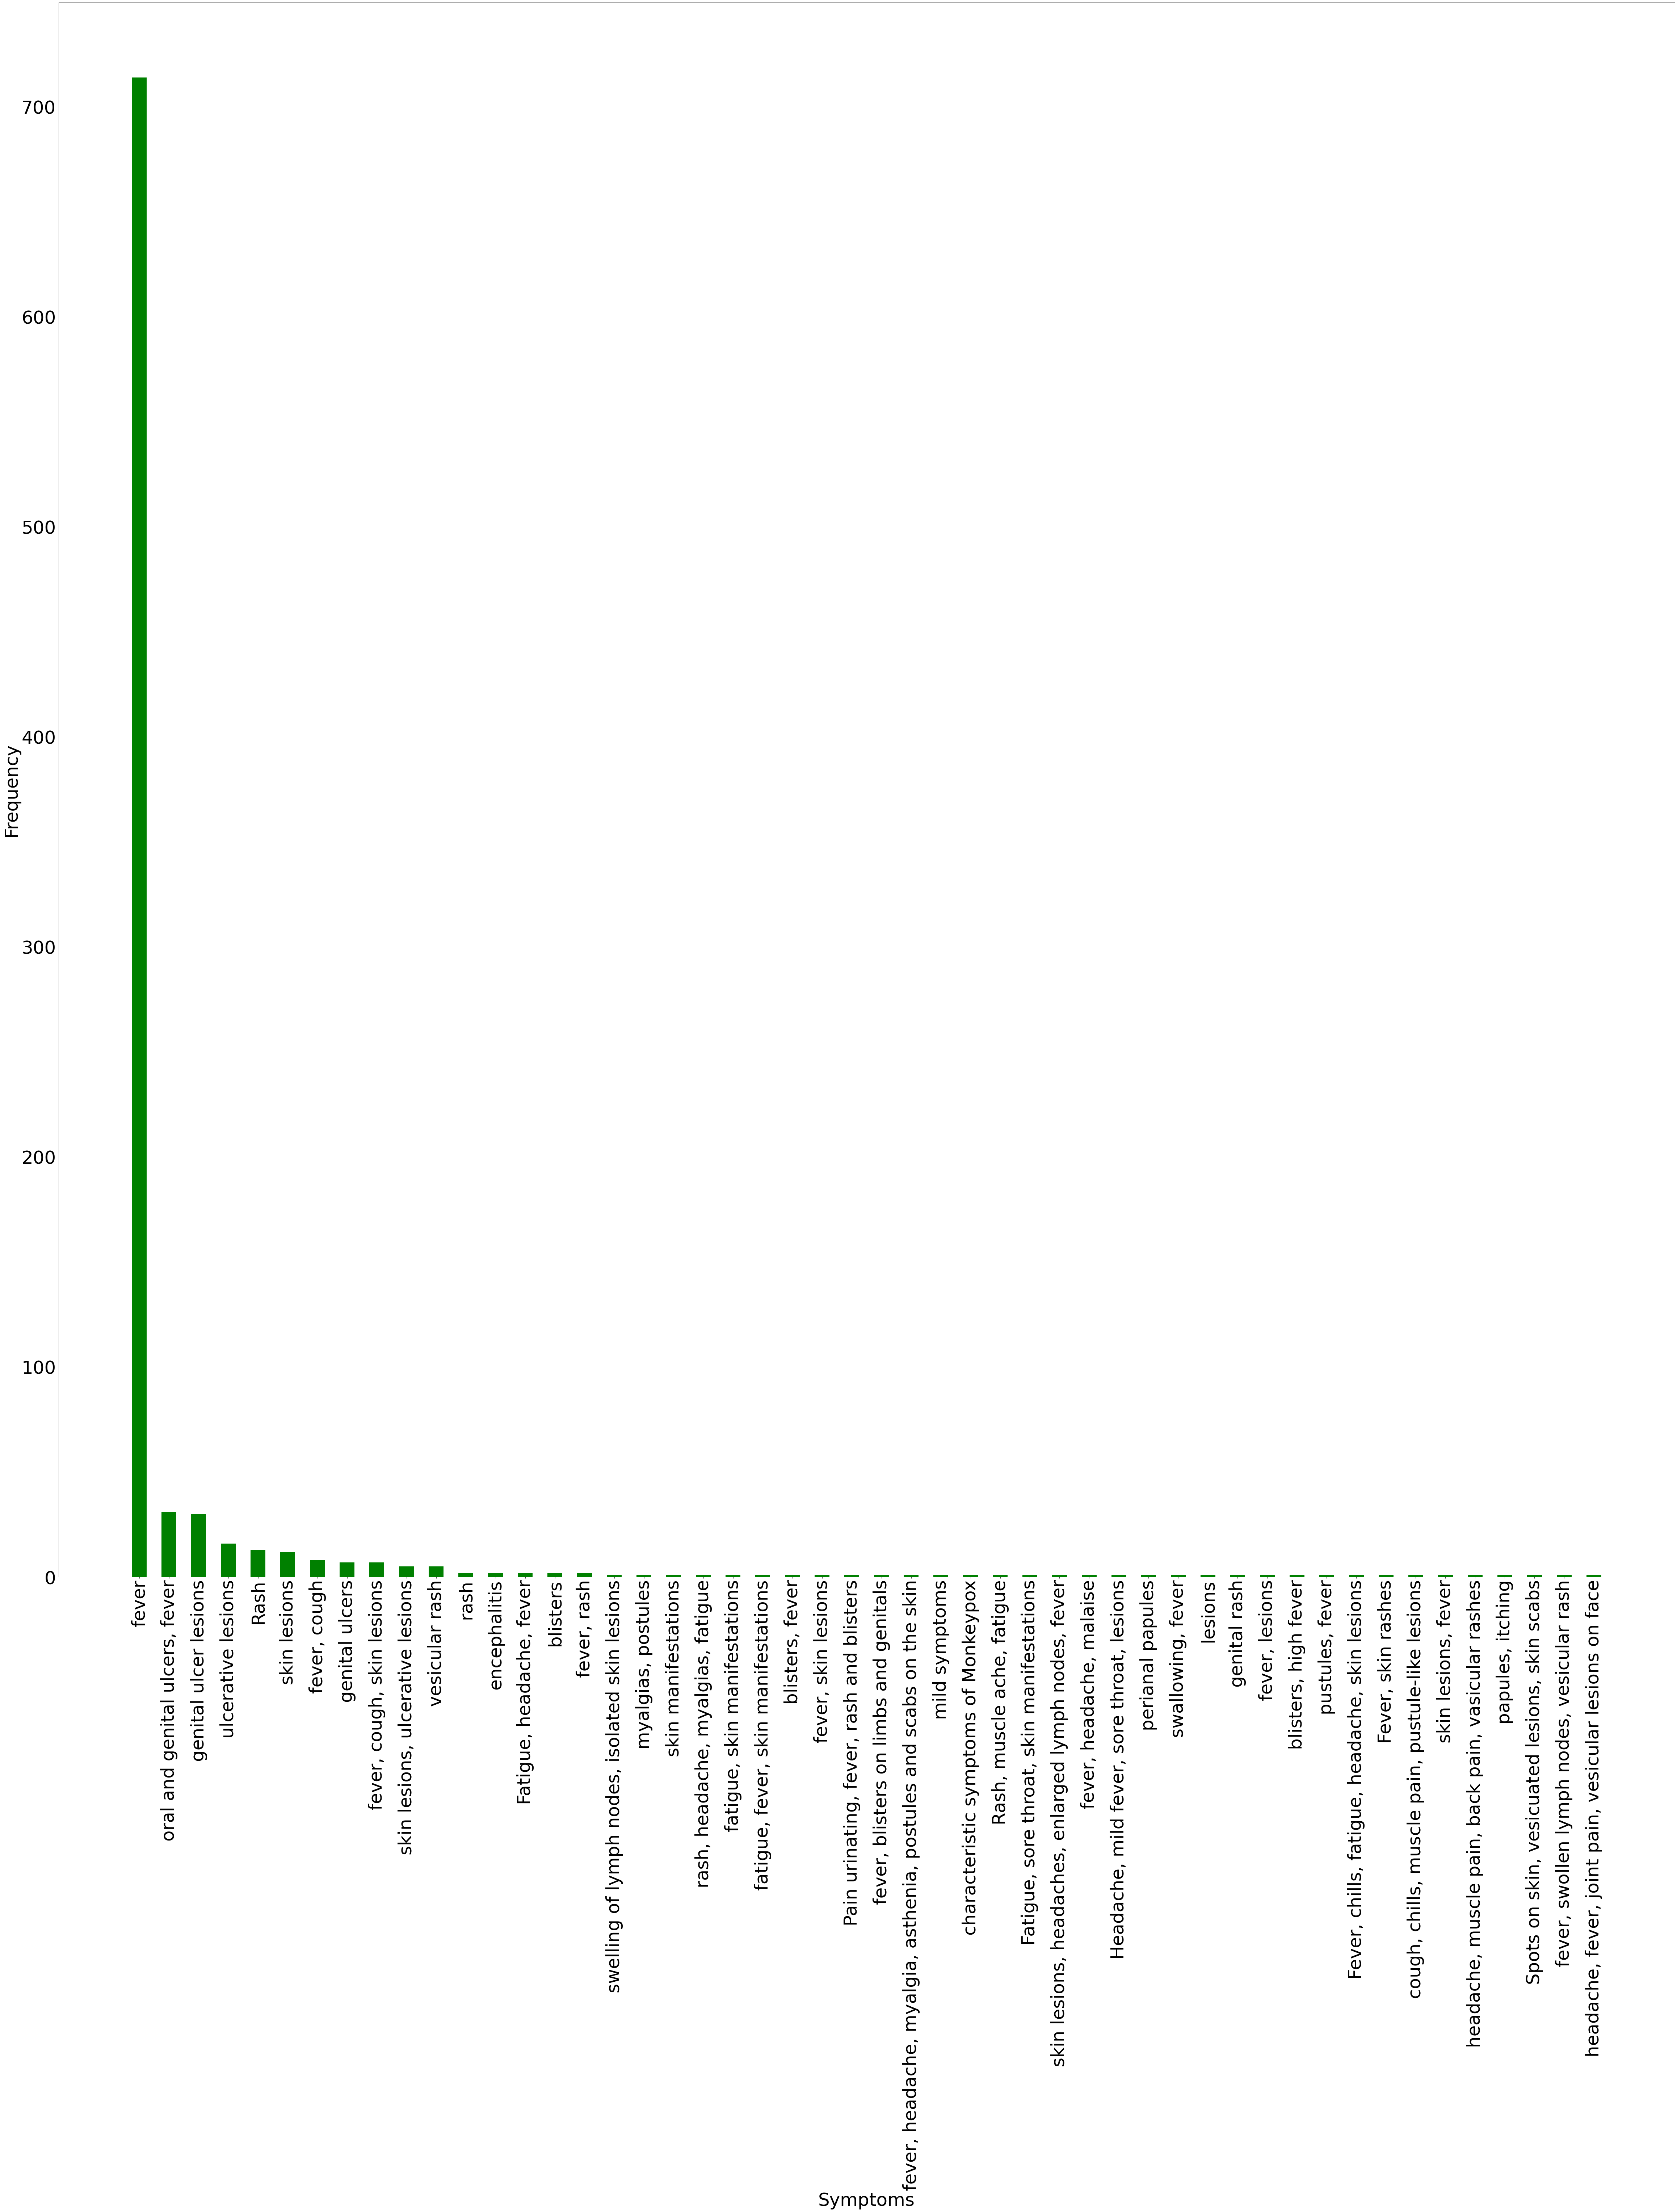

In [59]:
data69 = dict(monkeyPox_data['Symptoms'].value_counts())
plt.figure(figsize=[80,80])
plt.xticks(fontsize = 50, rotation = 90)
plt.yticks(fontsize = 50)
plt.bar(data69.keys(), data69.values(), color = 'green', width=0.5)
plt.xlabel("Symptoms",size=50)
plt.ylabel("Frequency",size=50)